In [1]:
from PIL import Image

# Load the image
image_path = "image.jpg"
image = Image.open(image_path)

# Perform JPEG compression (lossy)
compressed_image_path = "compressed_image.jpg"
quality = 50  # Adjust quality (1-100, lower means more compression)
image.save(compressed_image_path, "JPEG", quality=quality)

print(f"JPEG compression completed. Compressed image saved as {compressed_image_path}")

JPEG compression completed. Compressed image saved as compressed_image.jpg


In [2]:
# Perform PNG compression (lossless)
compressed_image_path = "compressed_image.png"
image.save(compressed_image_path, "PNG", optimize=True)

print(f"PNG compression completed. Compressed image saved as {compressed_image_path}")

PNG compression completed. Compressed image saved as compressed_image.png


In [3]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.datasets import mnist, cifar10
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.utils import to_categorical
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, roc_curve, auc
import matplotlib.pyplot as plt

In [4]:
# Load MNIST dataset
(x_train_mnist, y_train_mnist), (x_test_mnist, y_test_mnist) = mnist.load_data()

# Reshape and normalize data
x_train_mnist = x_train_mnist.reshape(-1, 28, 28, 1).astype('float32') / 255.0
x_test_mnist = x_test_mnist.reshape(-1, 28, 28, 1).astype('float32') / 255.0

# One-hot encode labels
y_train_mnist = to_categorical(y_train_mnist, 10)
y_test_mnist = to_categorical(y_test_mnist, 10)

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [5]:
# Define CNN model
model_mnist = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)),
    MaxPooling2D((2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(10, activation='softmax')
])

# Compile the model
model_mnist.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Train the model
history_mnist = model_mnist.fit(x_train_mnist, y_train_mnist, epochs=50, batch_size=128, validation_split=0.2)

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/50
375/375 ━━━━━━━━━━━━━━━━━━━━ 56s 143ms/step - accuracy: 0.7876 - loss: 0.6832 - val_accuracy: 0.9769 - val_loss: 0.0778
Epoch 2/50
375/375 ━━━━━━━━━━━━━━━━━━━━ 39s 104ms/step - accuracy: 0.9651 - loss: 0.1160 - val_accuracy: 0.9835 - val_loss: 0.0537
Epoch 3/50
375/375 ━━━━━━━━━━━━━━━━━━━━ 41s 106ms/step - accuracy: 0.9766 - loss: 0.0799 - val_accuracy: 0.9859 - val_loss: 0.0472
Epoch 4/50
375/375 ━━━━━━━━━━━━━━━━━━━━ 42s 108ms/step - accuracy: 0.9809 - loss: 0.0640 - val_accuracy: 0.9868 - val_loss: 0.0446
Epoch 5/50
375/375 ━━━━━━━━━━━━━━━━━━━━ 38s 100ms/step - accuracy: 0.9840 - loss: 0.0558 - val_accuracy: 0.9882 - val_loss: 0.0401
Epoch 6/50
375/375 ━━━━━━━━━━━━━━━━━━━━ 44s 109ms/step - accuracy: 0.9861 - loss: 0.0439 - val_accuracy: 0.9897 - val_loss: 0.0379
Epoch 7/50
375/375 ━━━━━━━━━━━━━━━━━━━━ 41s 108ms/step - accuracy: 0.9878 - loss: 0.0387 - val_accuracy: 0.9892 - val_loss: 0.0367
Epoch 8/50
375/375 ━━━━━━━━━━━━━━━━━━━━ 39s 102ms/step - accuracy: 0.9886 - loss: 0

313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step
MNIST Accuracy: 0.9931
Precision: 0.9931
Recall: 0.9931
F1-Score: 0.9931
Confusion Matrix:
[[ 974    1    1    0    0    0    2    1    1    0]
 [   0 1130    2    1    0    0    0    2    0    0]
 [   1    0 1026    0    0    0    0    3    2    0]
 [   0    0    1 1006    0    2    0    0    1    0]
 [   0    0    0    0  977    0    1    1    1    2]
 [   0    0    0    6    0  882    1    1    2    0]
 [   5    2    0    0    1    2  947    0    1    0]
 [   0    1    1    0    0    0    0 1025    0    1]
 [   0    0    2    0    0    0    0    1  971    0]
 [   2    0    0    2    4    3    0    3    2  993]]
AUC: 1.0000


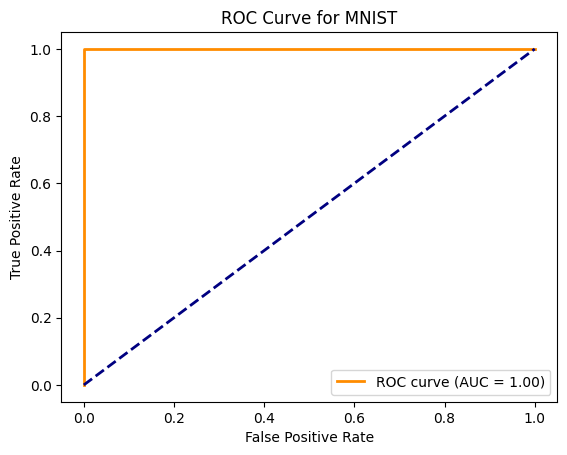

In [6]:
# Predict on test data
y_pred_mnist = model_mnist.predict(x_test_mnist)
y_pred_mnist_classes = np.argmax(y_pred_mnist, axis=1)
y_test_mnist_classes = np.argmax(y_test_mnist, axis=1)

# Calculate metrics
accuracy = accuracy_score(y_test_mnist_classes, y_pred_mnist_classes)
precision = precision_score(y_test_mnist_classes, y_pred_mnist_classes, average='weighted')
recall = recall_score(y_test_mnist_classes, y_pred_mnist_classes, average='weighted')
f1 = f1_score(y_test_mnist_classes, y_pred_mnist_classes, average='weighted')
conf_matrix = confusion_matrix(y_test_mnist_classes, y_pred_mnist_classes)

# ROC and AUC
fpr, tpr, _ = roc_curve(y_test_mnist_classes, y_pred_mnist[:, 1], pos_label=1)
roc_auc = auc(fpr, tpr)

# Print results
print(f"MNIST Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1-Score: {f1:.4f}")
print("Confusion Matrix:")
print(conf_matrix)
print(f"AUC: {roc_auc:.4f}")

# Plot ROC Curve
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for MNIST')
plt.legend(loc="lower right")
plt.show()

In [7]:
# Load CIFAR-10 dataset
(x_train_cifar, y_train_cifar), (x_test_cifar, y_test_cifar) = cifar10.load_data()

# Normalize data
x_train_cifar = x_train_cifar.astype('float32') / 255.0
x_test_cifar = x_test_cifar.astype('float32') / 255.0

# One-hot encode labels
y_train_cifar = to_categorical(y_train_cifar, 10)
y_test_cifar = to_categorical(y_test_cifar, 10)

170498071/170498071 ━━━━━━━━━━━━━━━━━━━━ 2s 0us/step


In [9]:
# Define CNN model
model_cifar = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)),
    MaxPooling2D((2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(10, activation='softmax')
])

# Compile the model
model_cifar.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Train the model
history_cifar = model_cifar.fit(x_train_cifar, y_train_cifar, epochs=1, batch_size=128, validation_split=0.2)

313/313 ━━━━━━━━━━━━━━━━━━━━ 77s 238ms/step - accuracy: 0.2718 - loss: 1.9824 - val_accuracy: 0.5028 - val_loss: 1.4296


313/313 ━━━━━━━━━━━━━━━━━━━━ 6s 18ms/step
CIFAR-10 Accuracy: 0.5071
Precision: 0.5096
Recall: 0.5071
F1-Score: 0.5025
Confusion Matrix:
[[521  49  60  30  22  11  28  42 152  85]
 [ 23 616   5  15   5   7  34  30  48 217]
 [ 75  14 302 140 149  78 116  78  29  19]
 [ 11  13  68 442  51 137 157  74   9  38]
 [ 33   6 124 105 369  39 175 118  18  13]
 [  5   6  77 323  68 335  65  94  16  11]
 [  4  10  32  85  95  20 697  22   5  30]
 [  9   8  21  84  72  80  64 614  11  37]
 [177  97  23  29   5  12  20  19 526  92]
 [ 31  99   9  24   6  12  58  55  57 649]]
AUC: 0.9420


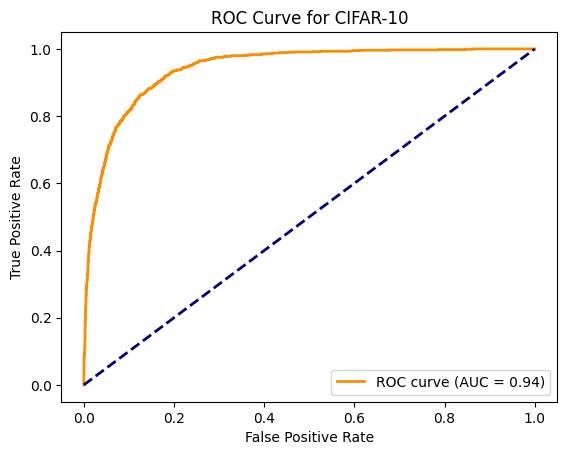

In [10]:
# Predict on test data
y_pred_cifar = model_cifar.predict(x_test_cifar)
y_pred_cifar_classes = np.argmax(y_pred_cifar, axis=1)
y_test_cifar_classes = np.argmax(y_test_cifar, axis=1)

# Calculate metrics
accuracy = accuracy_score(y_test_cifar_classes, y_pred_cifar_classes)
precision = precision_score(y_test_cifar_classes, y_pred_cifar_classes, average='weighted')
recall = recall_score(y_test_cifar_classes, y_pred_cifar_classes, average='weighted')
f1 = f1_score(y_test_cifar_classes, y_pred_cifar_classes, average='weighted')
conf_matrix = confusion_matrix(y_test_cifar_classes, y_pred_cifar_classes)

# ROC and AUC
fpr, tpr, _ = roc_curve(y_test_cifar_classes, y_pred_cifar[:, 1], pos_label=1)
roc_auc = auc(fpr, tpr)

# Print results
print(f"CIFAR-10 Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1-Score: {f1:.4f}")
print("Confusion Matrix:")
print(conf_matrix)
print(f"AUC: {roc_auc:.4f}")

# Plot ROC Curve
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for CIFAR-10')
plt.legend(loc="lower right")
plt.show()

In [11]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader, TensorDataset
from torchvision import datasets, transforms
import numpy as np
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, roc_curve, auc
import matplotlib.pyplot as plt

In [12]:
# Define transformations
transform_mnist = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize((0.1307,), (0.3081,))  # Normalize with mean and std of MNIST
])

# Load MNIST dataset
train_dataset_mnist = datasets.MNIST(root='./data', train=True, download=True, transform=transform_mnist)
test_dataset_mnist = datasets.MNIST(root='./data', train=False, download=True, transform=transform_mnist)

# Create data loaders
train_loader_mnist = DataLoader(train_dataset_mnist, batch_size=128, shuffle=True)
test_loader_mnist = DataLoader(test_dataset_mnist, batch_size=128, shuffle=False)

Failed to download (trying next):
HTTP Error 404: Not Found



100%|██████████| 9.91M/9.91M [00:00<00:00, 37.9MB/s]


Extracting ./data/MNIST/raw/train-images-idx3-ubyte.gz to ./data/MNIST/raw

Failed to download (trying next):
HTTP Error 404: Not Found



100%|██████████| 28.9k/28.9k [00:00<00:00, 1.23MB/s]


Extracting ./data/MNIST/raw/train-labels-idx1-ubyte.gz to ./data/MNIST/raw

Failed to download (trying next):
HTTP Error 404: Not Found



100%|██████████| 1.65M/1.65M [00:00<00:00, 7.81MB/s]


Extracting ./data/MNIST/raw/t10k-images-idx3-ubyte.gz to ./data/MNIST/raw

Failed to download (trying next):
HTTP Error 404: Not Found



100%|██████████| 4.54k/4.54k [00:00<00:00, 2.91MB/s]

Extracting ./data/MNIST/raw/t10k-labels-idx1-ubyte.gz to ./data/MNIST/raw



In [13]:
class CNN_MNIST(nn.Module):
    def __init__(self):
        super(CNN_MNIST, self).__init__()
        self.conv1 = nn.Conv2d(1, 32, kernel_size=3, stride=1, padding=1)
        self.pool = nn.MaxPool2d(kernel_size=2, stride=2, padding=0)
        self.conv2 = nn.Conv2d(32, 64, kernel_size=3, stride=1, padding=1)
        self.fc1 = nn.Linear(64 * 7 * 7, 128)
        self.dropout = nn.Dropout(0.5)
        self.fc2 = nn.Linear(128, 10)

    def forward(self, x):
        x = self.pool(nn.functional.relu(self.conv1(x)))
        x = self.pool(nn.functional.relu(self.conv2(x)))
        x = x.view(-1, 64 * 7 * 7)  # Flatten
        x = nn.functional.relu(self.fc1(x))
        x = self.dropout(x)
        x = self.fc2(x)
        return x

# Initialize model, loss function, and optimizer
model_mnist = CNN_MNIST()
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model_mnist.parameters(), lr=0.001)

In [14]:
# Training loop
epochs = 1
for epoch in range(epochs):
    model_mnist.train()
    running_loss = 0.0
    for images, labels in train_loader_mnist:
        optimizer.zero_grad()
        outputs = model_mnist(images)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()
        running_loss += loss.item()
    print(f"Epoch [{epoch+1}/{epochs}], Loss: {running_loss/len(train_loader_mnist):.4f}")

Epoch [1/1], Loss: 0.2754


MNIST Accuracy: 0.9838
Precision: 0.9839
Recall: 0.9838
F1-Score: 0.9838
Confusion Matrix:
[[ 974    0    3    0    0    0    1    1    1    0]
 [   0 1128    3    1    0    1    1    0    1    0]
 [   2    0 1025    1    1    0    0    2    1    0]
 [   0    0    2  998    0    5    0    3    2    0]
 [   0    0    2    0  969    0    1    0    3    7]
 [   3    0    1    3    0  879    2    1    1    2]
 [  12    3    1    0    3    2  936    0    1    0]
 [   1    4   15    4    0    0    0 1001    2    1]
 [   3    1    3    3    1    0    1    3  954    5]
 [   5    7    0    3    6    6    0    6    2  974]]
AUC: 0.9997


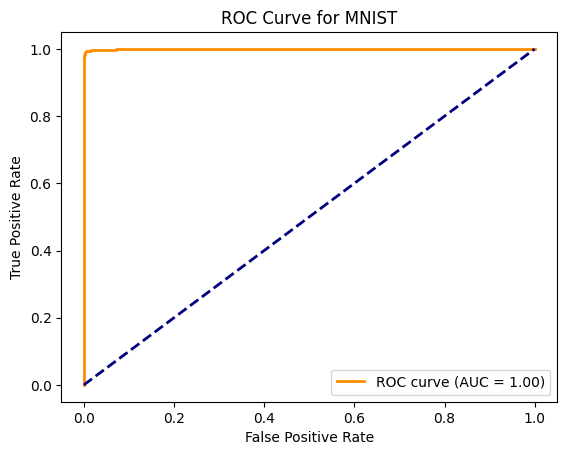

In [15]:
model_mnist.eval()
y_true_mnist = []
y_pred_mnist = []
y_scores_mnist = []

with torch.no_grad():
    for images, labels in test_loader_mnist:
        outputs = model_mnist(images)
        _, predicted = torch.max(outputs, 1)
        y_true_mnist.extend(labels.numpy())
        y_pred_mnist.extend(predicted.numpy())
        y_scores_mnist.extend(outputs[:, 1].numpy())  # Scores for ROC

# Calculate metrics
accuracy = accuracy_score(y_true_mnist, y_pred_mnist)
precision = precision_score(y_true_mnist, y_pred_mnist, average='weighted')
recall = recall_score(y_true_mnist, y_pred_mnist, average='weighted')
f1 = f1_score(y_true_mnist, y_pred_mnist, average='weighted')
conf_matrix = confusion_matrix(y_true_mnist, y_pred_mnist)

# ROC and AUC
fpr, tpr, _ = roc_curve(y_true_mnist, y_scores_mnist, pos_label=1)
roc_auc = auc(fpr, tpr)

# Print results
print(f"MNIST Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1-Score: {f1:.4f}")
print("Confusion Matrix:")
print(conf_matrix)
print(f"AUC: {roc_auc:.4f}")

# Plot ROC Curve
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for MNIST')
plt.legend(loc="lower right")
plt.show()

In [16]:
# Define transformations
transform_cifar = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))  # Normalize with mean and std of CIFAR-10
])

# Load CIFAR-10 dataset
train_dataset_cifar = datasets.CIFAR10(root='./data', train=True, download=True, transform=transform_cifar)
test_dataset_cifar = datasets.CIFAR10(root='./data', train=False, download=True, transform=transform_cifar)

# Create data loaders
train_loader_cifar = DataLoader(train_dataset_cifar, batch_size=128, shuffle=True)
test_loader_cifar = DataLoader(test_dataset_cifar, batch_size=128, shuffle=False)

100%|██████████| 170M/170M [00:01<00:00, 90.2MB/s]


Extracting ./data/cifar-10-python.tar.gz to ./data
Files already downloaded and verified


In [17]:
class CNN_CIFAR(nn.Module):
    def __init__(self):
        super(CNN_CIFAR, self).__init__()
        self.conv1 = nn.Conv2d(3, 32, kernel_size=3, stride=1, padding=1)
        self.pool = nn.MaxPool2d(kernel_size=2, stride=2, padding=0)
        self.conv2 = nn.Conv2d(32, 64, kernel_size=3, stride=1, padding=1)
        self.fc1 = nn.Linear(64 * 8 * 8, 128)
        self.dropout = nn.Dropout(0.5)
        self.fc2 = nn.Linear(128, 10)

    def forward(self, x):
        x = self.pool(nn.functional.relu(self.conv1(x)))
        x = self.pool(nn.functional.relu(self.conv2(x)))
        x = x.view(-1, 64 * 8 * 8)  # Flatten
        x = nn.functional.relu(self.fc1(x))
        x = self.dropout(x)
        x = self.fc2(x)
        return x

# Initialize model, loss function, and optimizer
model_cifar = CNN_CIFAR()
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model_cifar.parameters(), lr=0.001)

In [18]:
# Training loop
epochs = 1
for epoch in range(epochs):
    model_cifar.train()
    running_loss = 0.0
    for images, labels in train_loader_cifar:
        optimizer.zero_grad()
        outputs = model_cifar(images)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()
        running_loss += loss.item()
    print(f"Epoch [{epoch+1}/{epochs}], Loss: {running_loss/len(train_loader_cifar):.4f}")

Epoch [1/1], Loss: 1.6177


CIFAR-10 Accuracy: 0.5439
Precision: 0.5500
Recall: 0.5439
F1-Score: 0.5415
Confusion Matrix:
[[553  37  66  37  12   5  17  15 225  33]
 [ 40 739   7  12  10   3   9   8  83  89]
 [ 90  10 354 138 178  65  68  48  36  13]
 [ 23  20  89 473  72 144  87  44  26  22]
 [ 44  12 166 113 441  34  74  87  24   5]
 [ 12   4  79 301  64 377  36  95  27   5]
 [  7  16  61 113 123  13 628  14  14  11]
 [ 25   3  24 104  92  63  21 620  11  37]
 [ 85  59  20  20   5   6   4   8 765  28]
 [ 34 256  10  26   7   7  26  29 116 489]]
AUC: 0.9369


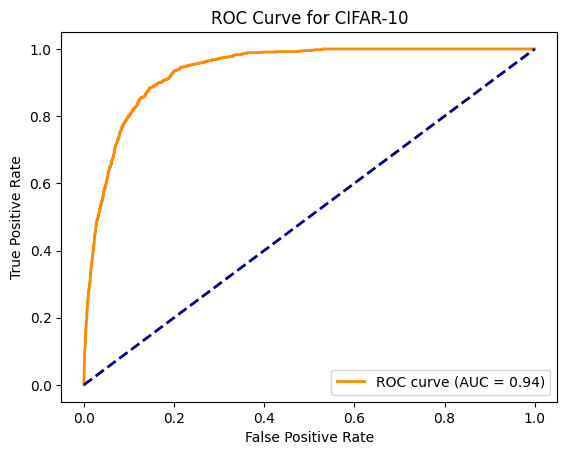

In [19]:
model_cifar.eval()
y_true_cifar = []
y_pred_cifar = []
y_scores_cifar = []

with torch.no_grad():
    for images, labels in test_loader_cifar:
        outputs = model_cifar(images)
        _, predicted = torch.max(outputs, 1)
        y_true_cifar.extend(labels.numpy())
        y_pred_cifar.extend(predicted.numpy())
        y_scores_cifar.extend(outputs[:, 1].numpy())  # Scores for ROC

# Calculate metrics
accuracy = accuracy_score(y_true_cifar, y_pred_cifar)
precision = precision_score(y_true_cifar, y_pred_cifar, average='weighted')
recall = recall_score(y_true_cifar, y_pred_cifar, average='weighted')
f1 = f1_score(y_true_cifar, y_pred_cifar, average='weighted')
conf_matrix = confusion_matrix(y_true_cifar, y_pred_cifar)

# ROC and AUC
fpr, tpr, _ = roc_curve(y_true_cifar, y_scores_cifar, pos_label=1)
roc_auc = auc(fpr, tpr)

# Print results
print(f"CIFAR-10 Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1-Score: {f1:.4f}")
print("Confusion Matrix:")
print(conf_matrix)
print(f"AUC: {roc_auc:.4f}")

# Plot ROC Curve
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for CIFAR-10')
plt.legend(loc="lower right")
plt.show()